# Analisis-viajes-de-taxi

### Desarrollo del proyecto

* importar los archivos
* estudiar los datos que contienen
* asegurarte de que los tipos de datos sean correctos
* identificar los 10 principales barrios en términos de finalización del recorrido
* hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
* sacar conclusiones basadas en cada gráfico y explicar los resultados

### Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

### Cargar datos

In [2]:
# Cargar los archivos
df_trips_amount = pd.read_csv("/datasets/project_sql_result_01.csv")
df_average_trips = pd.read_csv("/datasets/project_sql_result_04.csv")
df_info_trips = pd.read_csv("/datasets/project_sql_result_07.csv")

### Información General 

In [3]:
# Información general/resumida sobre el DataFrame:
df_trips_amount.info()
df_average_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [4]:
# Muestra de los datos 
print("Información  del Dtaframe: trips_amount")
df_trips_amount.head()

Información  del Dtaframe: trips_amount


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
print("Información  del Dtaframe: average_trips")
df_average_trips.head()

Información  del Dtaframe: average_trips


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [6]:
# Valores ausentes
print("Número de valores ausentes: df_trips_amount ", df_trips_amount.isna().sum())

Número de valores ausentes: df_trips_amount  company_name    0
trips_amount    0
dtype: int64


In [7]:
# Valores ausentes
print("Número de valores ausentes: df_average_trips", df_average_trips.isna().sum())

Número de valores ausentes: df_average_trips dropoff_location_name    0
average_trips            0
dtype: int64


In [8]:
# Valores duplicados
print("Número de valores duplicados: df_trips_amount", df_trips_amount.duplicated().sum())
print("Número de valores duplicados: df_average_trips", df_average_trips.duplicated().sum())

Número de valores duplicados: df_trips_amount 0
Número de valores duplicados: df_average_trips 0


<div class="alert alert-block alert-info">
De acuerdo con la informacion obtenida estos DF se observa que:
    
* Tienen 2 columnas cada uno,de tipo float, object y entero.
* Tienen los nombres de las columnas en minuscula.
* No tiene valores ausentes.
</div>

In [9]:
top_10_neighborhoods = df_average_trips.sort_values(by='average_trips', ascending=False).head(10)
print("Top 10 neighborhoods / finalized trips average:")
print(top_10_neighborhoods)

Top 10 neighborhoods / finalized trips average:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


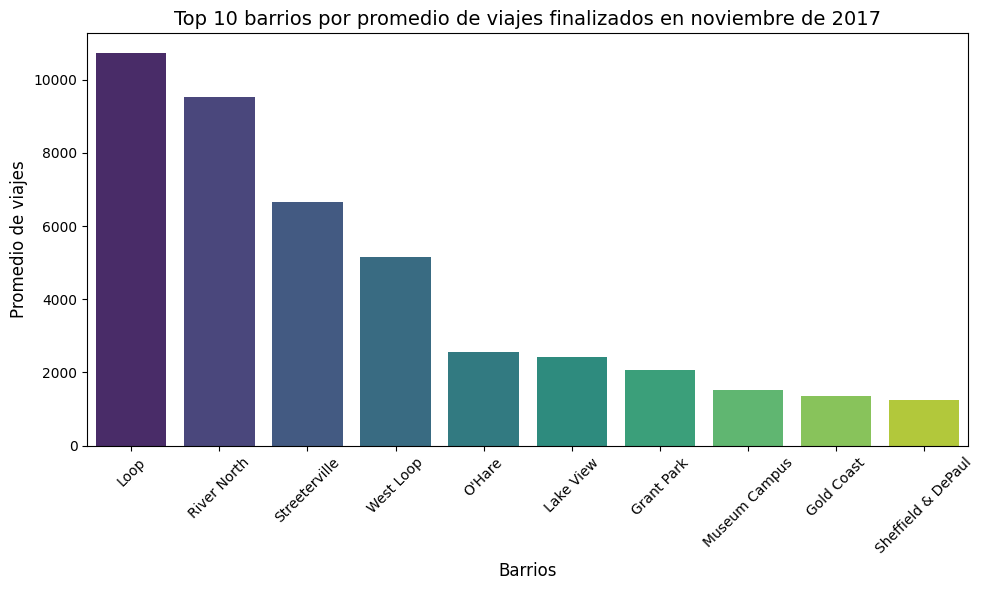

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='dropoff_location_name', y='average_trips', data=top_10_neighborhoods, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 barrios por promedio de viajes finalizados en noviembre de 2017', fontsize=14)
plt.xlabel('Barrios', fontsize=12)
plt.ylabel('Promedio de viajes', fontsize=12)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
De acuerdo con el grafico Top 10 se observa que:
    
* El barrio Loop es el barrio donde mas finalizan los viajes con mas de 10.000.
* 4 barrios barrios son los mas concurridos en la ciudad de acuerdo al número de finalizacion: Loop, River North, Streererville y West Loop.
* A partir del barrio O'hare se disminuyen el promedio de viajes a menos 3.000
</div>

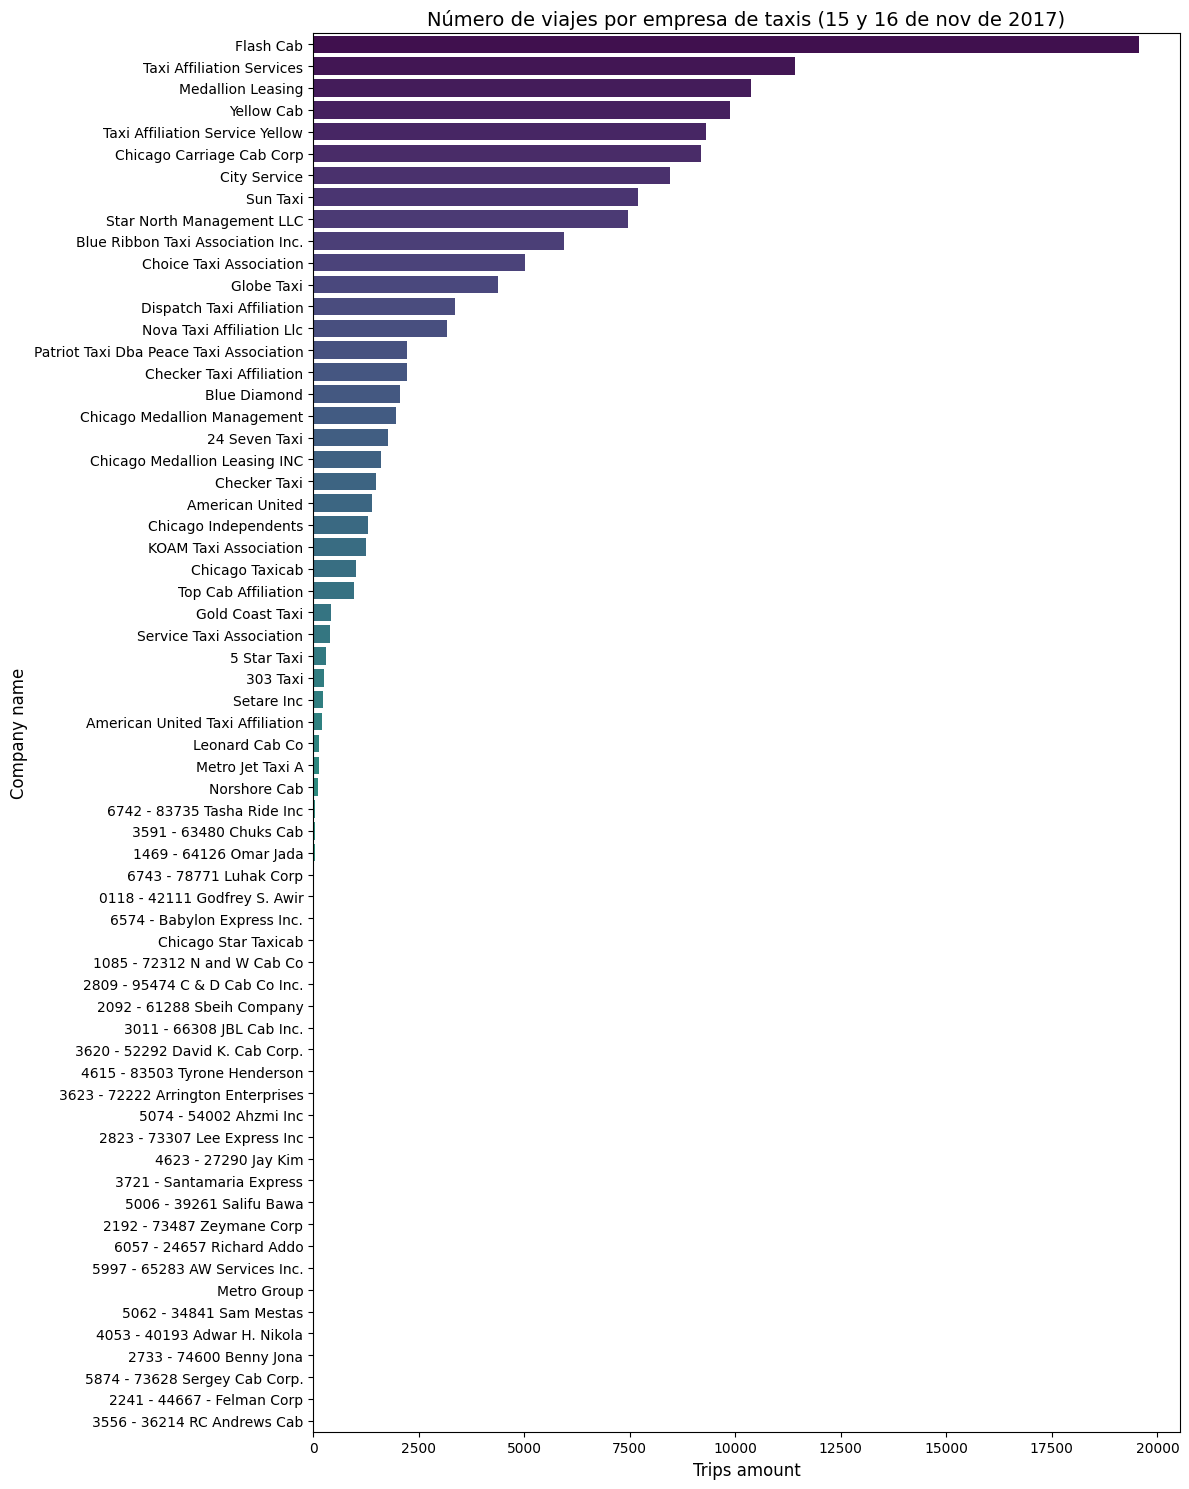

In [11]:
plt.figure(figsize=(12, 15))  
sns.barplot(y='company_name', x='trips_amount', data=df_trips_amount, palette='viridis')
plt.title('Número de viajes por empresa de taxis (15 y 16 de nov de 2017)', fontsize=14)
plt.xlabel('Trips amount', fontsize=12)
plt.ylabel('Company name', fontsize=12)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
De acuerdo con el grafico Top 10 se observa que:
    
* La empresa que lidera el numero de viajes es Flash Cab seguida de Taxi Affiliation Services y Medallion Leasin.
* Se ve refledo la popularidad en 10 empresas, las demas tienen menor presencia o no son tan conocidas  en el mercado.

</div>

### Prueba de hipótesis (Python)

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

Explica:

cómo planteaste las hipótesis nula y alternativa
qué criterio usaste para probar las hipótesis y por qué

In [12]:
# Filtrar los datos para sábados lluviosos
rainy_saturdays = df_info_trips[
    (df_info_trips['weather_conditions'] == 'Bad') &
    (pd.to_datetime(df_info_trips['start_ts']).dt.dayofweek == 5) # 5 representa sábados
]

# Filtrar los datos para sábados no lluviosos
non_rainy_saturdays = df_info_trips[
    (df_info_trips['weather_conditions'] == 'Good') &
    (pd.to_datetime(df_info_trips['start_ts']).dt.dayofweek == 5)
]

# Obtener las duraciones de los viajes
rainy_durations = rainy_saturdays['duration_seconds']
non_rainy_durations = non_rainy_saturdays['duration_seconds']

# Realizar la prueba t de Student para comparar las medias
t_stat, p_value = st.ttest_ind(rainy_durations, non_rainy_durations, equal_var=False)

#(alfa)
alpha = 0.05

# resultados
print("Estadístico t:", t_stat)
print("Valor p:", p_value)

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Existe una diferencia significativa en la duración promedio de los viajes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente de diferencia en las duraciones promedio.")

Estadístico t: 7.186034288068629
Valor p: 6.738994326108734e-12
Rechazamos la hipótesis nula: Existe una diferencia significativa en la duración promedio de los viajes.


<div class="alert alert-block alert-info">
    
Cconclusion :
    
* Se convirtió la columna start_ts a formato datetime para poder extraer los sábados.
* Se filtraron los datos según las condiciones climáticas (weather_conditions contiene la palabra "Rain") y el día de la semana.
* Comparación de grupos:
* Se separaron las duraciones de los viajes en dos grupos: sábados lluviosos y otros días.
* Se rechaza la hipotesis nula debido a que hay una diferencia significativa en la duración promedio de los viajes.

</div>